In [1]:
cd ../../..

/Users/stefaniequach/Projects/Intern/BPTK/Bitbucket/bptk_py_tutorial


## Data Collector for each agent

This tutorial explains how you set a new data collector. 

1. You first go to the simulation model you want to edit. In our case it is `SPMExtendedDataCollector.py` in `../simulation_models/spm`. You open the Python file.
2. Import the new data collector as follows: `from BPTK_Py.abm.datacollectors import ExtendedDataCollector`. 
3. Add `self.data_collector=ExtendedDataCollector()` in `instantiate_model(self)`.

In [2]:
# Start BPTK and automatically read the scenarios found in the scenarios folder
# this also loads all the Python classes referenced in the scenarios, so we are immediately ready 
# to run scenarios and plot results.

from BPTK_Py.bptk import bptk 

bptk = bptk()

In this step, we run the simulation model with a specific scenario. All statistics of each agent are collected by the data

In [3]:
model = bptk.scenario_manager_factory.get_scenario("ABMsmSimpleProjectManagementExtendedDataCollector","scenario80").model
model.run()

Now you can plot the stats of one or more specific agents. In our case we want to compare two tasks and see how much effort remains for them.

The following bullet points describe the parameters of the plot method:
- agent_ids: choose the stats of the agents you want plot
- properties: choose properties you want to plot
- title: choose title of the plot
- agent_type: choose the agent type

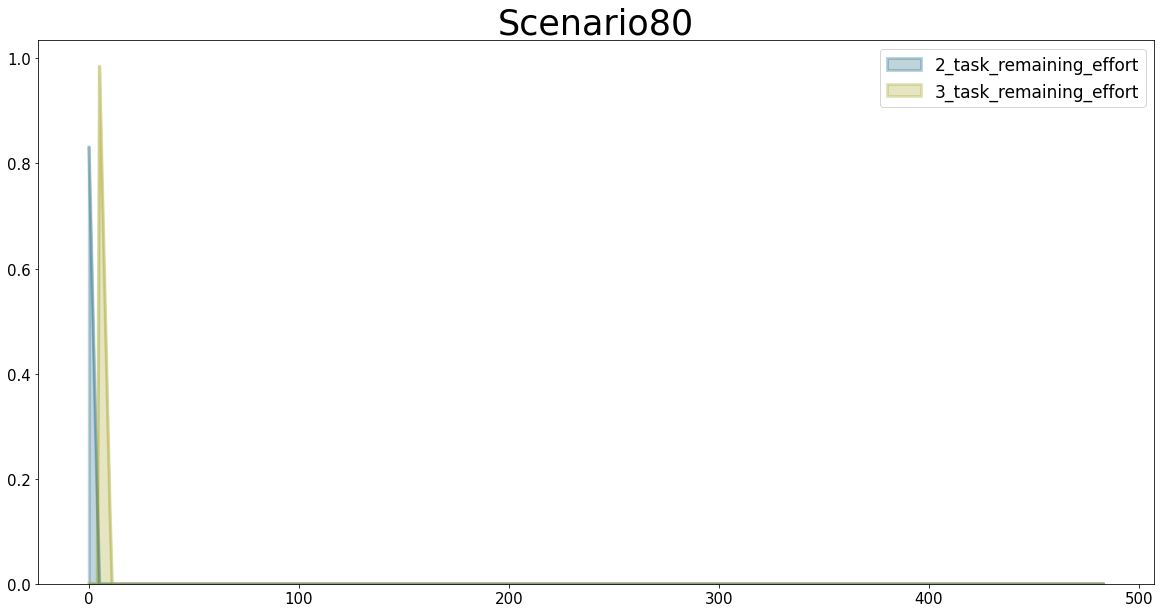

In [10]:
ax = model.data_collector.plot_agent_stats(agent_ids=[2,3],properties=['remaining_effort'],title="Scenario80",agent_type="task")

Output the stats in a dataframe

In [8]:
model.data_collector.get_agent_stats()['task'][2]

id    time  agent_state agent_type  effort  remaining_effort
0     2    0.00  in_progress       task       1          0.831200
1     2    0.25  in_progress       task       1          0.662273
2     2    0.50  in_progress       task       1          0.493219
3     2    0.75  in_progress       task       1          0.324038
4     2    1.00  in_progress       task       1          0.154729
..   ..     ...          ...        ...     ...               ...
479   2  119.75       closed       task       1          0.000000
480   2  120.00       closed       task       1          0.000000
481   2  120.25       closed       task       1          0.000000
482   2  120.50       closed       task       1          0.000000
483   2  120.75       closed       task       1          0.000000

[484 rows x 6 columns]

In [9]:
model.data_collector.get_agent_stats()['task'][3]

id    time agent_state agent_type  effort  remaining_effort
0     3    0.00        open       task       1               0.0
1     3    0.25        open       task       1               0.0
2     3    0.50        open       task       1               0.0
3     3    0.75        open       task       1               0.0
4     3    1.00        open       task       1               0.0
..   ..     ...         ...        ...     ...               ...
479   3  119.75      closed       task       1               0.0
480   3  120.00      closed       task       1               0.0
481   3  120.25      closed       task       1               0.0
482   3  120.50      closed       task       1               0.0
483   3  120.75      closed       task       1               0.0

[484 rows x 6 columns]

If you want to get all stats of each agent you call `model.data_collector.get_agent_stats()`

In [12]:
model.data_collector.get_agent_stats()

{'staf_member': {0:      id    time agent_state   agent_type
  0     0    0.00        busy  staf_member
  1     0    0.25        busy  staf_member
  2     0    0.50        busy  staf_member
  3     0    0.75        busy  staf_member
  4     0    1.00        busy  staf_member
  ..   ..     ...         ...          ...
  479   0  119.75   available  staf_member
  480   0  120.00   available  staf_member
  481   0  120.25   available  staf_member
  482   0  120.50   available  staf_member
  483   0  120.75   available  staf_member
  
  [484 rows x 4 columns]},
 'controlling': {1:      id    time agent_state   agent_type  productivity  schedule_pressure
  0     1    0.00      active  controlling      0.675200           0.800000
  1     1    0.25      active  controlling      0.675708           0.800313
  2     1    0.50      active  controlling      0.676216           0.800626
  3     1    0.75      active  controlling      0.676725           0.800939
  4     1    1.00      active  control